In [10]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [11]:
# Helper function to display the confusion matrix as a heatmap
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [12]:
# Load the preprocessed and scaled data saved in Notebook 2
import numpy as np

X_train_scaled = np.load("X_train_scaled.npy")
X_test_scaled = np.load("X_test_scaled.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")


In [13]:
#  Function to train and evaluate a given classification model
# It fits the model, makes predictions, prints a classification report,
# and displays the confusion matrix using the helper function
def train_and_evaluate_model(model, model_name):
    print(f"\n###  {model_name} Results")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))
    
    plot_conf_matrix(y_test, y_pred, f"Confusion Matrix - {model_name}")


##  Model Training & Evaluation

We will now train and evaluate three different classification models using the preprocessed data:

- **Logistic Regression**
- **k-Nearest Neighbors (KNN)**
- **Random Forest**

Each model will be evaluated using a classification report and a confusion matrix.



###  Logistic Regression Results

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82    107026
           1       0.74      0.33      0.45     55772

    accuracy                           0.73    162798
   macro avg       0.73      0.63      0.64    162798
weighted avg       0.73      0.73      0.69    162798



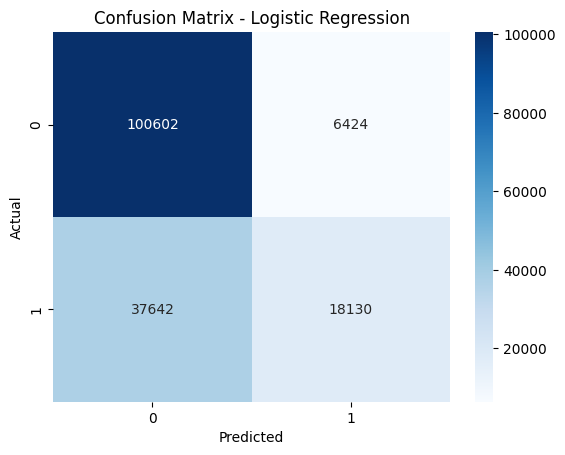

Best parameters (Logistic Regression): {'C': 10}

###  Logistic Regression (Tuned) Results

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82    107026
           1       0.74      0.33      0.45     55772

    accuracy                           0.73    162798
   macro avg       0.73      0.63      0.64    162798
weighted avg       0.73      0.73      0.69    162798



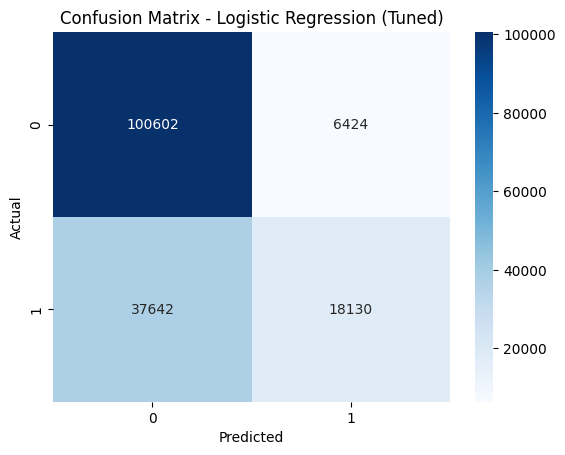

In [14]:
# Train and evaluate a Logistic Regression model
# Increased max_iter to ensure convergence during training

# -- Logistic Regression (Default)
logreg_model = LogisticRegression(max_iter=1000)
train_and_evaluate_model(logreg_model, "Logistic Regression")


# -- Logistic Regression (Tuned)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#  Tune regularization strength C (smaller = more regularization)
logreg_params = {'C': [0.01, 0.1, 1, 10, 100]}

logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000), logreg_params, cv=5)
logreg_grid.fit(X_train_scaled, y_train)

print("Best parameters (Logistic Regression):", logreg_grid.best_params_)
train_and_evaluate_model(logreg_grid.best_estimator_, "Logistic Regression (Tuned)")



###  k-Nearest Neighbors (k=5) Results

 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93    107026
           1       0.87      0.85      0.86     55772

    accuracy                           0.90    162798
   macro avg       0.90      0.89      0.89    162798
weighted avg       0.90      0.90      0.90    162798



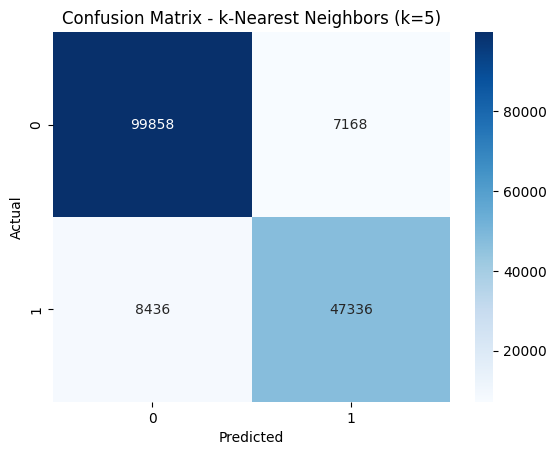

GridSearchCV (KNN) completed in 144.58 seconds
Best parameters (KNN): {'n_neighbors': 7}

###  k-Nearest Neighbors (Tuned) Results

 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93    107026
           1       0.87      0.85      0.86     55772

    accuracy                           0.91    162798
   macro avg       0.90      0.89      0.90    162798
weighted avg       0.91      0.91      0.91    162798



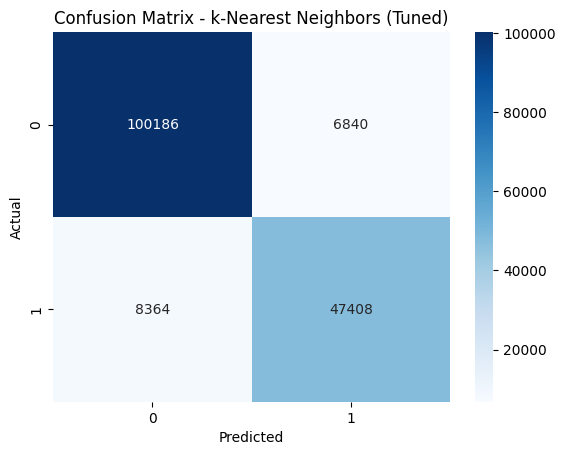

In [15]:
# Train and evaluate a k-Nearest Neighbors (KNN) model with k=5

# -- KNN (Default)

knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_model, "k-Nearest Neighbors (k=5)")

# -- KNN (Tuned)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import time

# Tune the number of neighbors (reduced range for faster tuning)
knn_params = {'n_neighbors': [3, 5, 7]}

#  Measure training time
start = time.time()

#  GridSearchCV with reduced cv and parallel processing
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

end = time.time()
print(f"GridSearchCV (KNN) completed in {end - start:.2f} seconds")

# Display best parameters and evaluate
print("Best parameters (KNN):", knn_grid.best_params_)
train_and_evaluate_model(knn_grid.best_estimator_, "k-Nearest Neighbors (Tuned)")




###  Random Forest Results

 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93    107026
           1       0.88      0.86      0.87     55772

    accuracy                           0.91    162798
   macro avg       0.90      0.90      0.90    162798
weighted avg       0.91      0.91      0.91    162798



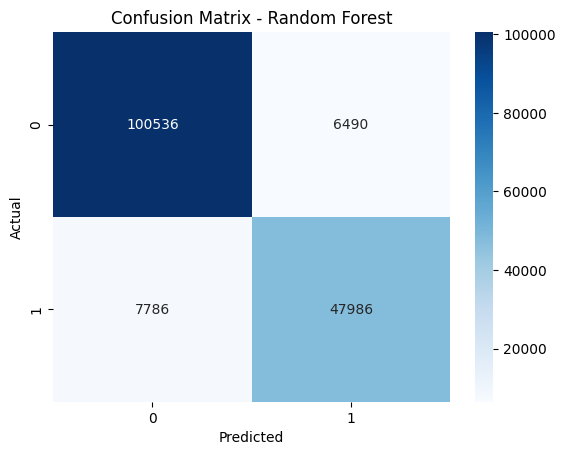

GridSearchCV (Random Forest) completed in 247.39 seconds
Best parameters (Random Forest): {'max_depth': None, 'n_estimators': 100}

###  Random Forest (Tuned) Results

 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93    107026
           1       0.88      0.86      0.87     55772

    accuracy                           0.91    162798
   macro avg       0.90      0.90      0.90    162798
weighted avg       0.91      0.91      0.91    162798



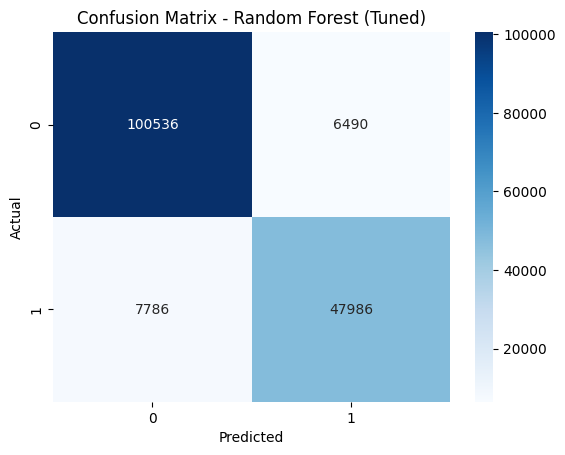

In [ ]:
# Train and evaluate a Random Forest classifier with 100 trees

# -- Random Forest (Default)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_model, "Random Forest")

# Performance comparison 


# -- Random Forest (Tuned)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Tune number of trees and maximum depth (reduced grid for speed)
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}

#  Measure training time
start = time.time()

# Use fewer folds and all CPU cores for faster search
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

end = time.time()
print(f"GridSearchCV (Random Forest) completed in {end - start:.2f} seconds")

#  Display best parameters and evaluate
print("Best parameters (Random Forest):", rf_grid.best_params_)
train_and_evaluate_model(rf_grid.best_estimator_, "Random Forest (Tuned)")



##  Final Remarks

All models have been trained, evaluated, and tuned using `GridSearchCV` with cross-validation.

**Summary:**
- **Logistic Regression** was tuned on regularization strength `C` using `cv=5`
- **k-Nearest Neighbors** was tuned on the number of neighbors `k` using `cv=3`
- **Random Forest** was tuned on the number of trees and maximum depth using `cv=3`

Cross-validation ensured that model evaluation was robust and not dependent on a single train-test split.

The best model can now be selected based on accuracy, recall, or other relevant metrics depending on the application's goal.
